In [ ]:
# import necesary packages
import time
import random
from probables import BloomFilter, QuotientFilter, CuckooFilter
import matplotlib.pyplot as plt

In [4]:
# Function to generate random unique DNA strings for benchmarking
def generate_random_dna_strings(num_strings, string_length=10):
    nucleotides = 'ACGT'
    random_strings = set()
    if 4**string_length < num_strings * 10:
        print("num_strings too large for this string length")
        return None
    while len(random_strings) < num_strings:
        s = ''.join(random.choices(nucleotides, k=string_length))
        random_strings.add(s)
    return list(random_strings)

# Function to measure false positive rate
def measure_false_positive_rate(filter_obj, filter_name, test_data, num_test_items):
    false_positives = 0
    for item in test_data:
        if item in filter_obj:
            false_positives += 1
    false_positive_rate = false_positives / num_test_items
    print(f"{filter_name} False Positive Rate: {false_positive_rate * 100:.4f}%")
    return false_positive_rate
# Function to make sure there are no false negatives
def no_false_negative(fitler_obj, filter_name, insert_data):
    for item in insert_data:
        if item not in fitler_obj:
            print(f"{filter_name} No False Negative: False")
            return item
    print(f"{filter_name} No False Negative: True")
    return True

# Function to insert item(s) into the filter_obj and measure the total time
def insert_and_test_time(filter_obj, item):
    if type(item) is list or type(item) is set:
        s = time.time()
        for it in item:
            filter_obj.add(it)
        e = time.time()
    else:
        s = time.time()
        filter_obj.add(item)
        e = time.time()
    return e - s

# Function to query item(s) and measure the time to query the items
def query_and_test_time(filter_obj, item):
    if type(item) is list or type(item) is set:
        s = time.time()
        for it in item:
            it in filter_obj
        e = time.time()
    else:
        s = time.time()
        it in filter_obj
        e = time.time()
    return e - s

# Function to query item(s) and check whether the items are present
def query(filter_obj, item):
    if type(item) is list or type(item) is set:
        res = []
        for it in item:
            if it in filter_obj:
                res.append(True)
            else:
                res.append(False)
        return res
    else:
        if it in filter_obj:
            return [True]
        else:
            return [False]

In [5]:
# Generate random sequence to insert and to test false positive rate
random.seed(0)
num_total = 200000 # total sequence generated
num_quot = 124500 # 95% of quotient max occupancy
num_insert_bc = 95000 # 95% of bloom, cuckoo max occupancy
total_set = generate_random_dna_strings(num_total, string_length=15)
lst = list(total_set) 
insert_set = set(lst[:num_insert_bc]) # set to insert to bloom cuckoo
insert_set_q = set(lst[:num_quot]) # set to insert to quotient
test_set = set(lst[num_quot:]) # testing set

In [6]:
# maxocc = 100000
n = 100000
fpr = 0.01  
bloom_filter = BloomFilter(n, fpr)

# maxocc = 100000
capacity = 25000
bucket_size = 4
cuckoo_filter = CuckooFilter(capacity, bucket_size, auto_expand= False, max_swaps=1000000)
# maxocc = 131072
q = 17
quoteint_filter = QuotientFilter(q)

In [ ]:
# Benchmark insertion time
b_time = []
c_time = []
q_time = []
num_part = 95
for i in range(num_part):
    partition_size = int((len(insert_set)/num_part))
    partition = list(insert_set)[i * partition_size: (i+1) * partition_size]
    b_time.append(insert_and_test_time(bloom_filter, partition) / partition_size * 100) # time per 100
    c_time.append(insert_and_test_time(cuckoo_filter, partition) / partition_size * 100)

for i in range(num_part):
    partition_size = int((len(insert_set_q)/num_part))
    partition = list(insert_set_q)[i * partition_size: (i+1) * partition_size]
    q_time.append(insert_and_test_time(quoteint_filter, partition) / partition_size * 100)

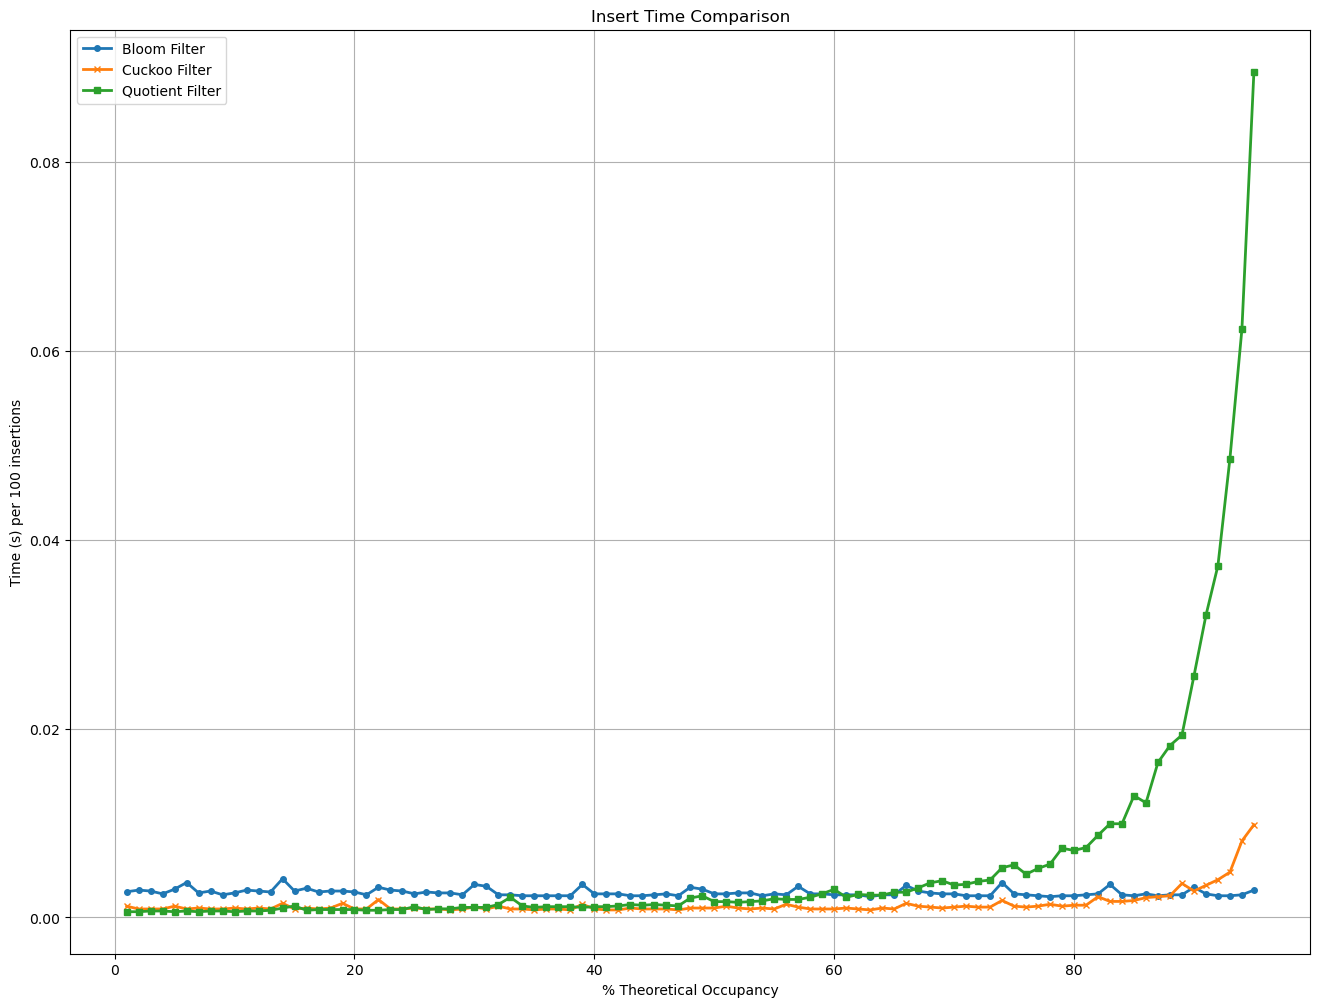

In [ ]:
x = range(1, len(b_time) + 1)

plt.figure(figsize=(16,12))
plt.plot(x, b_time, marker='o', linewidth=2, label='Bloom Filter', markersize = 4)
plt.plot(x, c_time, marker='x', linewidth=2, label='Cuckoo Filter', markersize = 4)
plt.plot(x, q_time, marker='s', linewidth=2, label='Quotient Filter', markersize = 4)

plt.xlabel('% Theoretical Occupancy')
plt.ylabel('Time (s) per 100 insertions') 
plt.title('Insert Time Comparison')
plt.legend(loc='best')
plt.grid(True)

plt.show()

In [ ]:
# Benchmark querying time
bloom_filter = BloomFilter(n, fpr)
cuckoo_filter = CuckooFilter(capacity, bucket_size, auto_expand= False, max_swaps=1000000)
quoteint_filter = QuotientFilter(q)

b_time_q = []
c_time_q = []
q_time_q = []
num_part = 95
for i in range(num_part):
    partition_size = int((len(insert_set)/num_part))
    partition = list(insert_set)[i * partition_size: (i+1) * partition_size]
    # insert the elements
    insert_and_test_time(bloom_filter, partition)
    insert_and_test_time(cuckoo_filter, partition)
    # test the query time after insertion
    b_time_q.append(query_and_test_time(bloom_filter, list(test_set)[:1000]) / 10)
    c_time_q.append(query_and_test_time(cuckoo_filter, list(test_set)[:1000]) / 10)
    
for i in range(num_part):
    partition_size = int((len(insert_set_q)/num_part))
    partition = list(insert_set_q)[i * partition_size: (i+1) * partition_size]
    insert_and_test_time(quoteint_filter, partition)
    q_time_q.append(query_and_test_time(quoteint_filter, list(test_set)[:1000]) / 10)

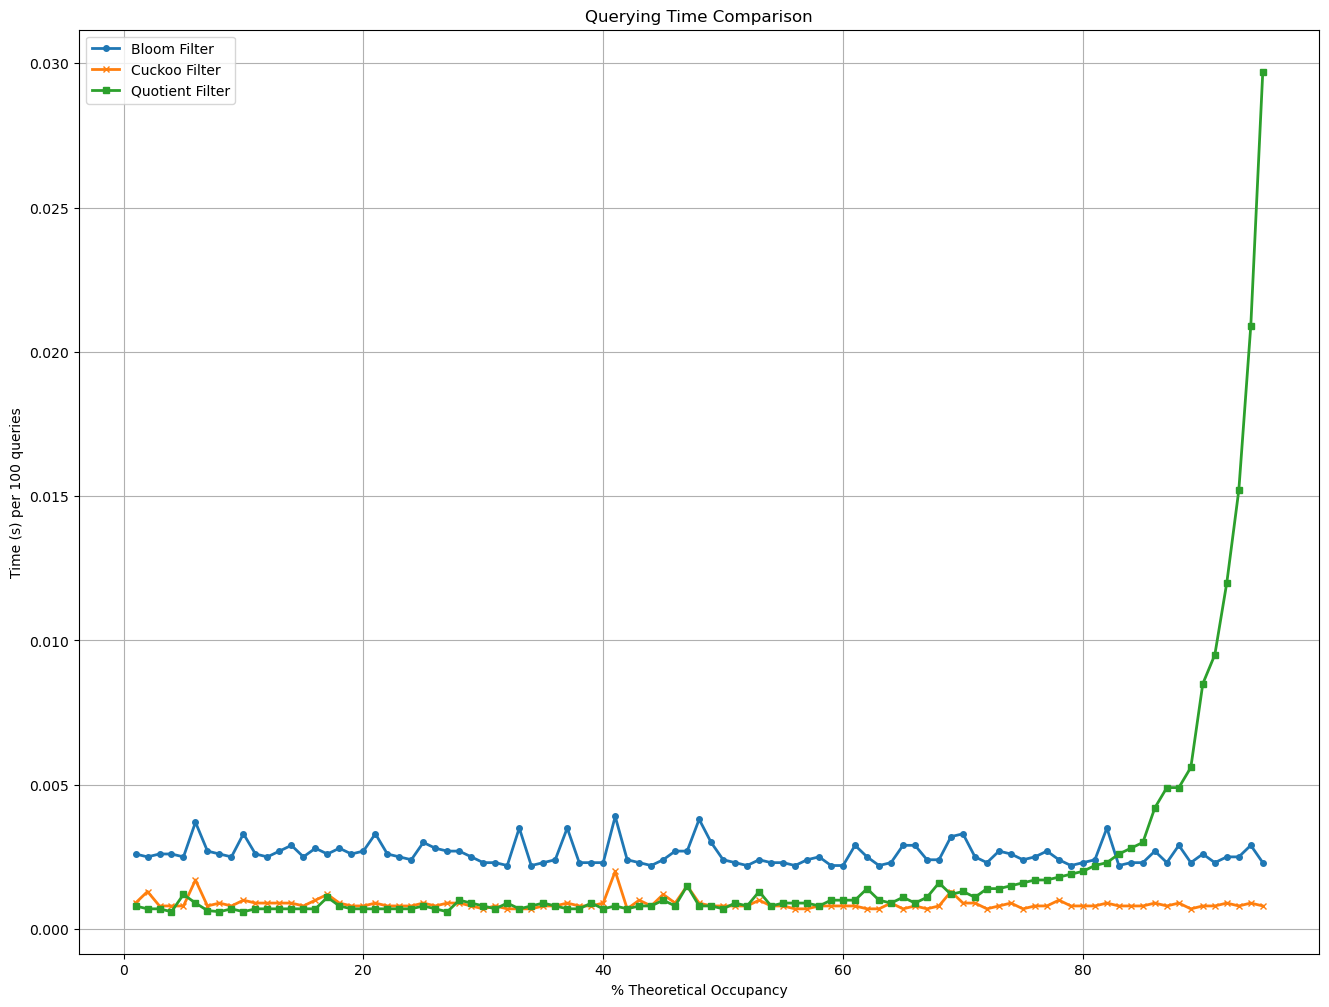

In [ ]:
x = range(1, len(b_time_q) + 1)

plt.figure(figsize=(16,12))
plt.plot(x, b_time_q, marker='o', linewidth=2, label='Bloom Filter', markersize = 4)
plt.plot(x, c_time_q, marker='x', linewidth=2, label='Cuckoo Filter', markersize = 4)
plt.plot(x, q_time_q, marker='s', linewidth=2, label='Quotient Filter', markersize = 4)

plt.xlabel('% Theoretical Occupancy')
plt.ylabel('Time (s) per 100 queries')  # Replace "units" with your actual time unit
plt.title('Querying Time Comparison')
plt.legend(loc='best')

plt.grid(True)

plt.show()

In [ ]:
# Benchmark false positive rate
bloom_filter = BloomFilter(n, fpr)
cuckoo_filter = CuckooFilter(capacity, bucket_size, auto_expand= False, max_swaps=1000000)
quoteint_filter = QuotientFilter(q)

b_fpr = []
c_fpr = []
q_fpr = []
num_part = 19
for i in range(num_part):
    partition_size = int((len(insert_set)/num_part))
    partition = list(insert_set)[i * partition_size: (i+1) * partition_size]
    # insert the elements
    insert_and_test_time(bloom_filter, partition)
    insert_and_test_time(cuckoo_filter, partition)
    # test the false positive rate
    b_fpr.append(sum(query(bloom_filter, test_set))/ len(test_set))
    c_fpr.append(sum(query(cuckoo_filter, test_set))/ len(test_set))
    
for i in range(num_part):
    partition_size = int((len(insert_set_q)/num_part))
    partition = list(insert_set_q)[i * partition_size: (i+1) * partition_size]
    insert_and_test_time(quoteint_filter, partition)
    q_fpr.append(sum(query(quoteint_filter, test_set))/ len(test_set))

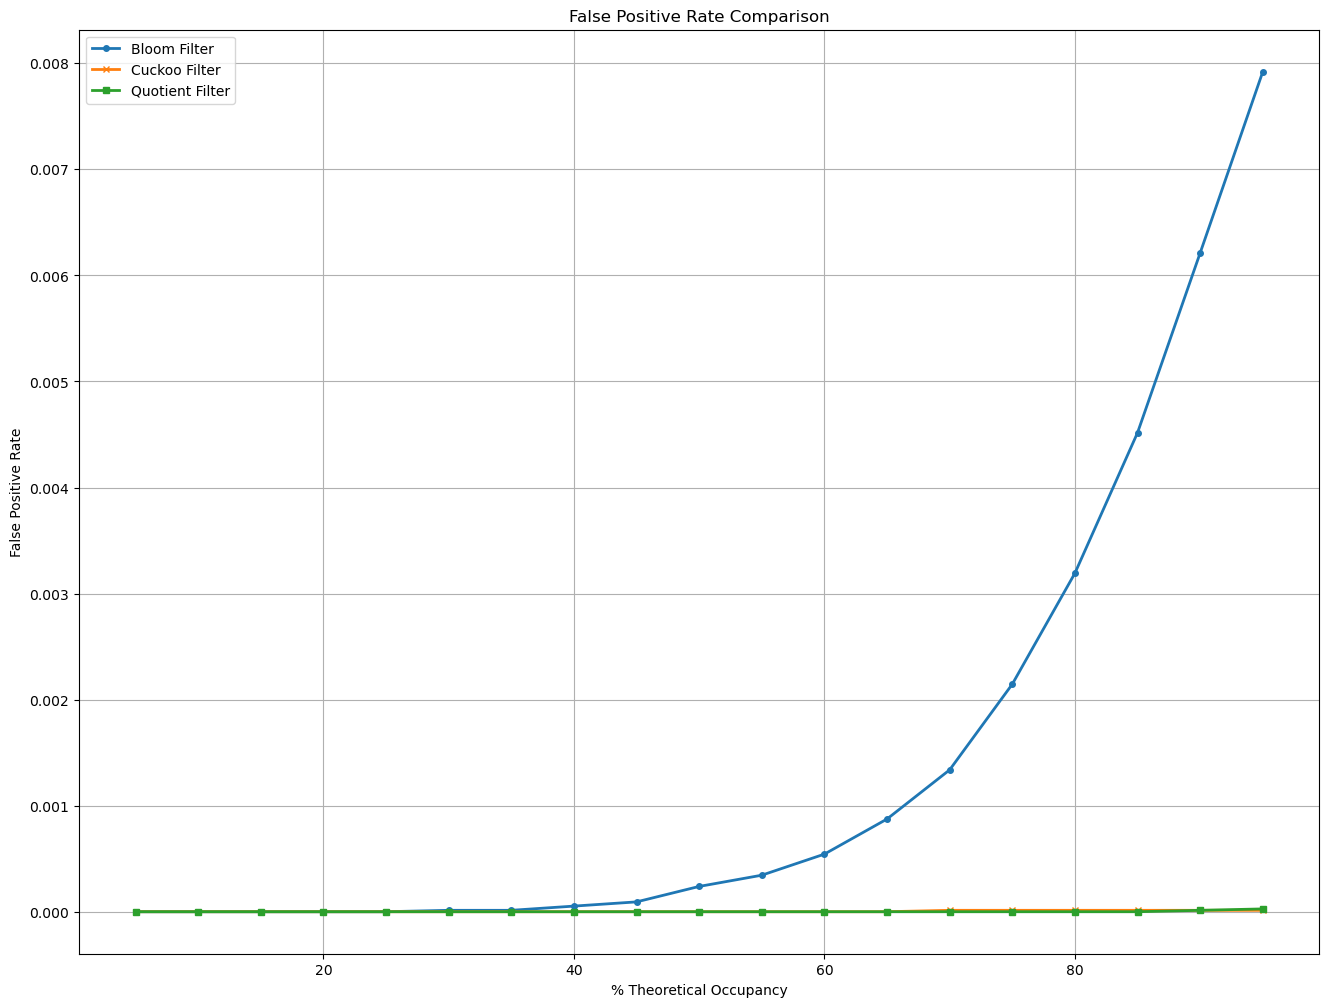

In [ ]:
x = range(5, 5 * num_part + 1, 5)

plt.figure(figsize=(16,12))
plt.plot(x, b_fpr, marker='o', linewidth=2, label='Bloom Filter', markersize = 4)
plt.plot(x, c_fpr, marker='x', linewidth=2, label='Cuckoo Filter', markersize = 4)
plt.plot(x, q_fpr, marker='s', linewidth=2, label='Quotient Filter', markersize = 4)

plt.xlabel('% Theoretical Occupancy')
plt.ylabel('False Positive Rate')  # Replace "units" with your actual time unit
plt.title('False Positive Rate Comparison')
plt.legend(loc='best')
plt.grid(True)

plt.show()